In [1]:
# Standard Imports
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split

In [2]:
# Read the Data in Pandas DataFrame
sessions = pandas.read_csv("C:/Users/RANJA/OneDrive/Documents/BABI/Jupyter Lab Files/Janata Hack/train.csv")

In [3]:
sessions.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,1/12/2014 15:58,1/12/2014 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [4]:
sessions.shape

(10500, 5)

In [5]:
sessions.describe()

,session_id,startTime,endTime,ProductList,gender
count,10500,10500,10500,10500,10500
unique,10500,8815,8803,9402,2
top,u13084,17/12/14 12:29,9/12/2014 14:58,A00002/B00002/C00007/D00266/,female
freq,1,5,5,25,8192


#### This shows everything is of object type

In [6]:
sessions.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

#### Dependent columns Histogram Split

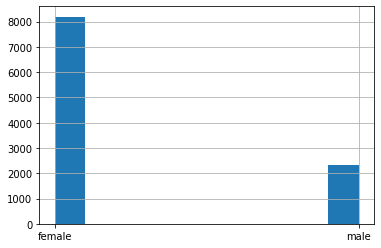

In [7]:
sessions['gender'].hist();

##### The histogram shows data is skewed.. 8000 Females X 2500 Males

#### Standardizing the DateTime fields

In [6]:
sessions['startTime'] = pandas.to_datetime(sessions['startTime'])

In [7]:
sessions.dtypes

session_id             object
startTime      datetime64[ns]
endTime                object
ProductList            object
gender                 object
dtype: object

In [8]:
sessions.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,2014-12-15 18:11:00,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,2014-12-16 14:35:00,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,2014-01-12 15:58:00,1/12/2014 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,2014-11-23 02:57:00,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,2014-12-17 16:44:00,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [9]:
sessions['endTime'] = pandas.to_datetime(sessions['endTime'])

#### Replacing the Dependent Column with 0's and 1's

* Female = 1
* Male = 0

In [10]:
sessions['gender'].replace(to_replace = 'female', value = '1', inplace = True)

In [11]:
sessions['gender']

0           1
1        male
2           1
3           1
4        male
         ... 
10495       1
10496       1
10497       1
10498       1
10499       1
Name: gender, Length: 10500, dtype: object

In [12]:
sessions['gender'].replace(to_replace = 'male', value = '0', inplace = True)

#### Changing the Gender type to int32

In [13]:
sessions['gender'] = sessions['gender'].astype(dtype = 'int32')

In [16]:
sessions.dtypes

session_id             object
startTime      datetime64[ns]
endTime        datetime64[ns]
ProductList            object
gender                  int32
dtype: object

#### Create DataFrame 1 with the session_id, datetimes and gender

In [14]:
sess1 = pandas.DataFrame(sessions.drop('ProductList', axis = 1))

In [15]:
sess1.head()

,session_id,startTime,endTime,gender
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,1
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,0


#### Create DataFrame 2 with session_id, ProductList and gender

In [16]:
sess2 = pandas.DataFrame(sessions.drop(labels = ['startTime', 'endTime'], axis = 1))

In [17]:
sess2.head()

,session_id,ProductList,gender
0,u16159,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,1
1,u10253,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,0
2,u19037,A00002/B00001/C00020/D16944/,1
3,u14556,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,1
4,u24295,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,0


#### Split the products to seperate rows in DataFrame 2

In [52]:
# Create a new DataFrame from the old one with session_id as the index
df = pandas.DataFrame(data = (sess2.ProductList.str.split(';').tolist()), index = sess2.session_id).stack()

In [19]:
df.head()

session_id   
u16159      0    A00002/B00003/C00006/D28435/
            1    A00002/B00003/C00006/D02554/
            2    A00002/B00003/C00006/D28436/
            3    A00002/B00003/C00006/D28437/
u10253      0    A00001/B00009/C00031/D29404/
dtype: object

In [20]:
# Getting rid of the secondary index, make session_id as a column(
#it can't be an index since it would have duplicate values now)
df = df.reset_index([0, 'session_id'])

In [21]:
df.head()

,session_id,0
0,u16159,A00002/B00003/C00006/D28435/
1,u16159,A00002/B00003/C00006/D02554/
2,u16159,A00002/B00003/C00006/D28436/
3,u16159,A00002/B00003/C00006/D28437/
4,u10253,A00001/B00009/C00031/D29404/


In [22]:
len(df)

23251

In [23]:
# Re-setting the column names
df.columns = ['session_id', 'ProductList']

In [50]:
# df['startTime'] = sessions['startTime'].apply(lambda x : df['session_id'] == sessions['session_id'])

for i, row in df[0]:
    #if(row['session_id'] == sessions['session_id']):
    #    row['startTime'] = sessions['startTime']
    print(row[i])

KeyError: 0

#### Plotting the TimeSeries data for time aspect

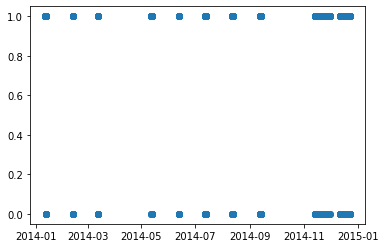

In [26]:
# Getting the data ready

pyplot.plot_date(sess1['startTime'], sess1['gender']);

#########################################################################################

In [25]:
sessions['Time'] = sessions['startTime'].dt.hour

In [26]:
sessions.head()

,session_id,startTime,endTime,ProductList,gender,Time
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,1,18
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,0,14
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,1,15
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,1,2
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,0,16


In [27]:
sessions['SessionTime'] = sessions['endTime'] - sessions['startTime']

In [28]:
sessions.head()

,session_id,startTime,endTime,ProductList,gender,Time,SessionTime
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,1,18,00:01:00
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,0,14,00:06:00
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,1,15,00:00:00
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,1,2,00:03:00
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,0,16,00:02:00


#### Importing pre-processed data for ProductList Column

In [30]:
train_pre = pandas.read_csv("C:/Users/RANJA/OneDrive/Documents/BABI/Jupyter Lab Files/Janata Hack/train_processed.csv")

In [31]:
train_pre.head()

,session_id,startTime,endTime,gender,ProductList1,ProductList2,ProductList3,ProductList4,ProductList5,ProductList6,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,u16159,15/12/14 18:11,15/12/14 18:12,female,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28437/,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,u10253,16/12/14 14:35,16/12/14 14:41,male,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D02617/,A00001/B00009/C00031/D29407/,A00001/B00009/C00031/D29410/,A00001/B00009/C00031/D29411/,A00001/B00009/C00031/D25444/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u19037,1/12/2014 15:58,1/12/2014 15:58,female,A00002/B00001/C00020/D16944/,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u14556,23/11/14 2:57,23/11/14 3:00,female,A00002/B00004/C00018/D10284/,A00002/B00004/C00018/D10285/,A00002/B00004/C00018/D10286/,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u24295,17/12/14 16:44,17/12/14 16:46,male,A00001/B00001/C00012/D30805/,A00001/B00001/C00012/D30806/,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
train_pre.columns

Index(['session_id', 'startTime', 'endTime', 'gender', 'ProductList1',
       'ProductList2', 'ProductList3', 'ProductList4', 'ProductList5',
       'ProductList6', 'ProductList7', 'ProductList8', 'ProductList9',
       'ProductList10', 'ProductList11', 'ProductList12', 'ProductList13',
       'ProductList14', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

In [33]:
train_pre.drop(labels = ['Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 
                         'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
                        'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
                        'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'], axis = 1, 
              inplace = True)

In [34]:
train_pre.head()

,session_id,startTime,endTime,gender,ProductList1,ProductList2,ProductList3,ProductList4,ProductList5,ProductList6,ProductList7,ProductList8,ProductList9,ProductList10,ProductList11,ProductList12,ProductList13,ProductList14
0,u16159,15/12/14 18:11,15/12/14 18:12,female,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28437/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,u10253,16/12/14 14:35,16/12/14 14:41,male,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D02617/,A00001/B00009/C00031/D29407/,A00001/B00009/C00031/D29410/,A00001/B00009/C00031/D29411/,A00001/B00009/C00031/D25444/,A00001/B00009/C00031/D29418/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u19037,1/12/2014 15:58,1/12/2014 15:58,female,A00002/B00001/C00020/D16944/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u14556,23/11/14 2:57,23/11/14 3:00,female,A00002/B00004/C00018/D10284/,A00002/B00004/C00018/D10285/,A00002/B00004/C00018/D10286/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u24295,17/12/14 16:44,17/12/14 16:46,male,A00001/B00001/C00012/D30805/,A00001/B00001/C00012/D30806/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
train_pre['startTime'] = pandas.to_datetime(sessions['startTime'])
train_pre['endTime'] = pandas.to_datetime(sessions['endTime'])

In [38]:
train_pre['gender'].replace(to_replace = 'male', value = '0', inplace = True)
train_pre['gender'].replace(to_replace = 'female', value = '1', inplace = True)

In [39]:
train_pre.head()

,session_id,startTime,endTime,gender,ProductList1,ProductList2,ProductList3,ProductList4,ProductList5,ProductList6,ProductList7,ProductList8,ProductList9,ProductList10,ProductList11,ProductList12,ProductList13,ProductList14
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28437/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,0,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D02617/,A00001/B00009/C00031/D29407/,A00001/B00009/C00031/D29410/,A00001/B00009/C00031/D29411/,A00001/B00009/C00031/D25444/,A00001/B00009/C00031/D29418/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1,A00002/B00001/C00020/D16944/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,1,A00002/B00004/C00018/D10284/,A00002/B00004/C00018/D10285/,A00002/B00004/C00018/D10286/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,0,A00001/B00001/C00012/D30805/,A00001/B00001/C00012/D30806/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
train_pre['Time'] = train_pre['startTime'].dt.hour

In [40]:
train_pre['SessionTime'] = train_pre['endTime'] - train_pre['startTime']

In [45]:
train_pre.head()

,session_id,startTime,endTime,gender,ProductList1,ProductList2,ProductList3,ProductList4,ProductList5,ProductList6,ProductList7,ProductList8,ProductList9,ProductList10,ProductList11,ProductList12,ProductList13,ProductList14,SessionTime,Time
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28437/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01:00,18
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,0,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D02617/,A00001/B00009/C00031/D29407/,A00001/B00009/C00031/D29410/,A00001/B00009/C00031/D29411/,A00001/B00009/C00031/D25444/,A00001/B00009/C00031/D29418/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:06:00,14
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1,A00002/B00001/C00020/D16944/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,15
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,1,A00002/B00004/C00018/D10284/,A00002/B00004/C00018/D10285/,A00002/B00004/C00018/D10286/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:03:00,2
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,0,A00001/B00001/C00012/D30805/,A00001/B00001/C00012/D30806/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:02:00,16


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create X and y

X = train_pre.drop(labels = ['session_id', 'gender', 'startTime', 'endTime'], axis = 1)
y = train_pre['gender']

# Splitting them into Train and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Building the model

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Score the model

clf.score(X_test, y_test)

ValueError: could not convert string to float: 'A00002/B00002/C00007/D30553/'

### Receiving the above Error since `.fit()` doesn't accept string input!!!

In [49]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.2 (default, Mar 25 2020, 08:56:29) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\RANJA\OneDrive\Documents\BABI\Jupyter Lab Files\ZTM\env\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 46.1.3.post20200330
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [53]:
train_pre.columns

Index(['session_id', 'startTime', 'endTime', 'gender', 'ProductList1',
       'ProductList2', 'ProductList3', 'ProductList4', 'ProductList5',
       'ProductList6', 'ProductList7', 'ProductList8', 'ProductList9',
       'ProductList10', 'ProductList11', 'ProductList12', 'ProductList13',
       'ProductList14', 'SessionTime', 'Time'],
      dtype='object')

In [57]:
df = pandas.melt(train_pre, id_vars = ['session_id', 'startTime', 'endTime', 'gender', 'SessionTime', 'Time'], 
           value_vars = ['ProductList1', 'ProductList2', 'ProductList3', 'ProductList4', 'ProductList5', 'ProductList6',
                        'ProductList7', 'ProductList8', 'ProductList9', 'ProductList10', 'ProductList11', 'ProductList12',
                        'ProductList13', 'ProductList14'], value_name = 'ProductList')

In [58]:
df.head()

,session_id,startTime,endTime,gender,SessionTime,Time,variable,ProductList
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList1,A00002/B00003/C00006/D28435/
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,0,00:06:00,14,ProductList1,A00001/B00009/C00031/D29404/
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,1,00:00:00,15,ProductList1,A00002/B00001/C00020/D16944/
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,1,00:03:00,2,ProductList1,A00002/B00004/C00018/D10284/
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,0,00:02:00,16,ProductList1,A00001/B00001/C00012/D30805/


In [65]:
u16159 = df[df['session_id'] == 'u16159']

In [66]:
u16159

,session_id,startTime,endTime,gender,SessionTime,Time,variable,ProductList
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList1,A00002/B00003/C00006/D28435/
10500,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList2,A00002/B00003/C00006/D02554/
21000,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList3,A00002/B00003/C00006/D28436/
31500,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList4,A00002/B00003/C00006/D28437/
42000,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList5,NaN
52500,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList6,NaN
63000,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList7,NaN
73500,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList8,NaN
84000,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList9,NaN
94500,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList10,NaN


In [67]:
df.dropna(axis = 0, inplace = True)

In [68]:
u16159 = df[df['session_id'] == 'u16159']
u16159

,session_id,startTime,endTime,gender,SessionTime,Time,variable,ProductList
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList1,A00002/B00003/C00006/D28435/
10500,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList2,A00002/B00003/C00006/D02554/
21000,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList3,A00002/B00003/C00006/D28436/
31500,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,1,00:01:00,18,ProductList4,A00002/B00003/C00006/D28437/


In [69]:
len(df)

22907

## HURRAY!!!!!

### Now, let's try Encoding of the variabe on ProductList

In [78]:
# Before trying encoding we need to split the X & Y

X = df.drop(labels = ['session_id', 'gender', 'startTime', 'endTime', 'variable'], axis = 1)
y = df['gender']

In [79]:
X.head()

,SessionTime,Time,ProductList
0,00:01:00,18,A00002/B00003/C00006/D28435/
1,00:06:00,14,A00001/B00009/C00031/D29404/
2,00:00:00,15,A00002/B00001/C00020/D16944/
3,00:03:00,2,A00002/B00004/C00018/D10284/
4,00:02:00,16,A00001/B00001/C00012/D30805/


In [80]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
transformed_df = enc.fit_transform(X)

In [81]:
t_df = pandas.DataFrame(transformed_df)
t_df.head()

,0,1,2
0,17.0,18.0,8397.0
1,22.0,14.0,1341.0
2,16.0,15.0,2876.0
3,19.0,2.0,9587.0
4,18.0,16.0,168.0


### Kudos to shiva for making it so farrrrrrrrrrrrr!!!

Let's try our Random Forest Classifier Now

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Splitting them into Train and Testing

X_train, X_test, y_train, y_test = train_test_split(t_df, y, test_size = 0.2)

In [86]:
X_train.head()

,0,1,2
17535,22.0,16.0,5390.0
5422,16.0,14.0,15196.0
7635,17.0,22.0,15183.0
16127,20.0,21.0,5656.0
8933,16.0,8.0,13514.0


In [87]:
y_train.head()

29581    1
5422     1
7635     1
23876    1
8933     1
Name: gender, dtype: object

In [88]:
len(X_train), len(X_test)

(18325, 4582)

In [89]:
# Building the model

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Score the model

clf.score(X_test, y_test)

0.9041903099083369

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
y_predicted = clf.predict(X_test)

confusion_matrix(y_test, y_predicted)

array([[ 722,  244],
       [ 195, 3421]], dtype=int64)

In [95]:
(3421+722)/4582

0.9041903099083369